# Dates and times

We'll get to the thorny issue of dates in a moment, but first let's look at a little timer function to time your code.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/sciris/sciris/HEAD?labpath=docs%2Ftutorials%2Ftut_dates.ipynb) to open an interactive version of this notebook.
    
</div>


## Timing

The most basic form of profiling (as covered in the previous tutorial) is just timing how long different parts of your code take. It's not _too_ hard to do this in Python:

In [1]:
import time
import numpy as np

n = 5_000

start = time.time()
zeros = np.zeros((n,n))
zeros_time = time.time()
rand = np.random.rand(n,n)
rand_time = time.time()

print(f'Time to make zeros: {(zeros_time - start):n} s')
print(f'Time to make random numbers: {(rand_time - zeros_time):n} s')

Time to make zeros: 3.0756e-05 s
Time to make random numbers: 0.101258 s


As you probably could've guessed, in Sciris there's an easier way, inspired my Matlab's [tic and toc](https://www.mathworks.com/help/matlab/ref/tic.html):

In [2]:
import sciris as sc

T = sc.timer()

T.tic()
zeros = np.zeros((n,n))
T.toc('Time to make zeros')

T.tic()
rand = np.random.rand(n,n)
T.toc('Time to make random numbers')

Time to make zeros: 42.0 μs
Time to make random numbers: 0.101 s


We can simplify this even further: we often call `toc()` followed by `tic()`, so instead we can just call `toctic()` or `tt()` for short; w can also omit the first `tic()`:

In [3]:
T = sc.timer()

zeros = np.zeros((n,n))
T.tt('Time to make zeros')

rand = np.random.rand(n,n)
T.tt('Time to make random numbers')

Time to make zeros: 59.8 μs
Time to make random numbers: 0.102 s


You can also use `sc.timer()` in a `with` block, which is perhaps most intuitive of all:

In [4]:
with sc.timer('Time to make zeros'):
    zeros = np.zeros((n,n))

with sc.timer('Time to make random numbers'):
    rand = np.random.rand(n,n)

Time to make zeros: 27.9 μs
Time to make random numbers: 0.104 s


If we have multiple timings, we can also do statistics on them or plot the results:

Generating 634,220 numbers: 3.85 ms
Generating 269,479 numbers: 1.40 ms
Generating 1,388,091 numbers: 5.95 ms
Generating 1,688,242 numbers: 7.10 ms
Generating 3,802,816 numbers: 15.5 ms
mean 0.006766510009765625
std 0.004792133450196387
min 0.0014023780822753906
max 0.015529394149780273


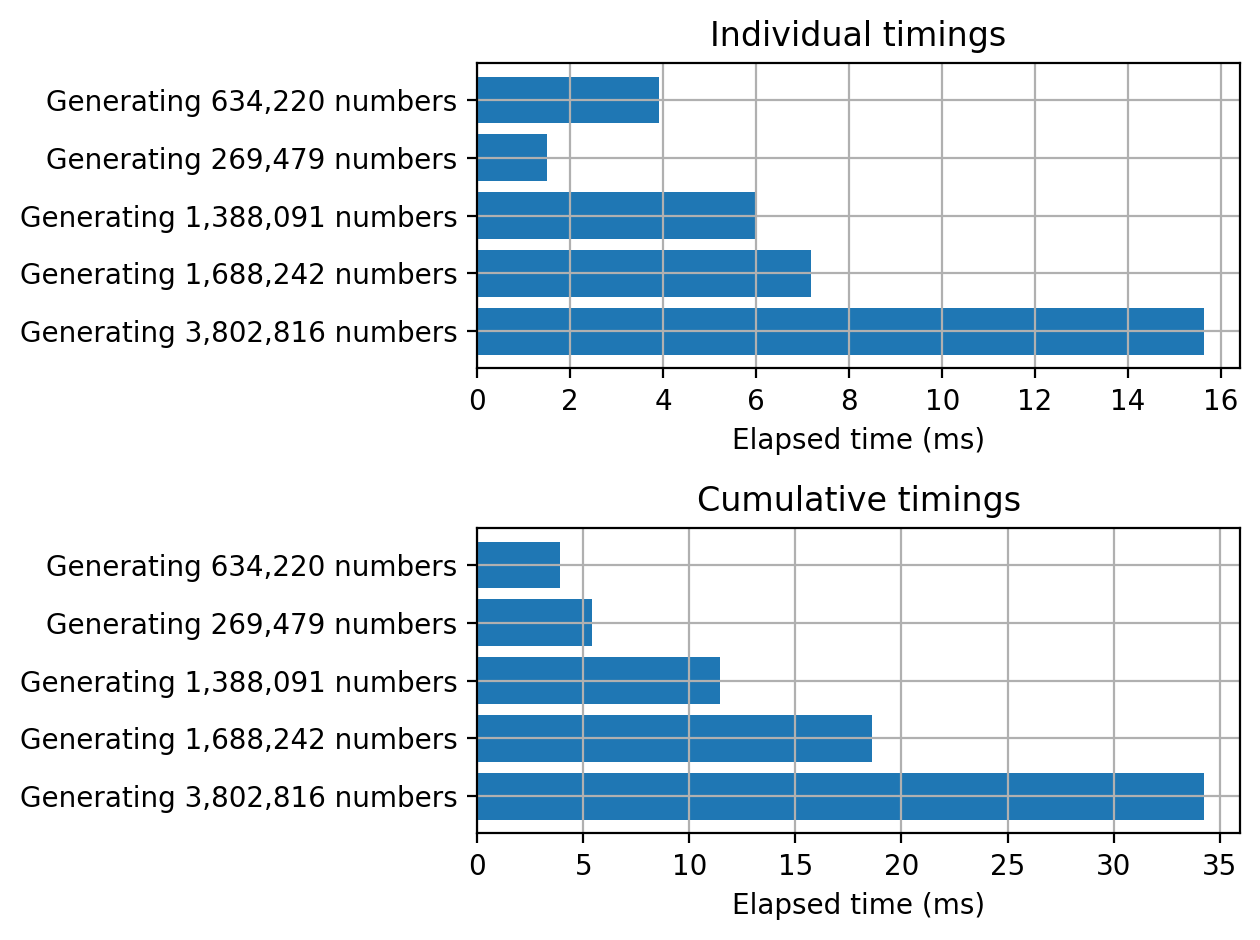

In [5]:
T = sc.timer()

for i in range(5):
    rnd = np.random.rand(int((i+1)*np.random.rand()*1e6))
    T.tt(f'Generating {len(rnd):,} numbers')

print('mean', T.mean())
print('std',  T.std())
print('min',  T.min())
print('max',  T.max())
T.plot();

## Sleeping

For completeness, let's talk about Sciris' two sleep functions. Both are related to `time.sleep()`. 

The first is `sc.timedsleep()`. If called directly it acts just like `time.sleep()`. But you can also use it in a for loop to take into account the rest of the time taken by the other operations in the loop so that each loop iteration takes exactly the desired amount of time:

In [16]:
import numpy as np

for i in range(5):
    sc.timedsleep('start') # Initialize
    n = int(np.random.rand()*1e6) # Variable computation time
    for j in range(n):
        tmp = np.random.rand()
    sc.timedsleep(0.3, verbose=True) # Wait for 0.3 seconds per iteration including computation time

Pausing for 0.215799 s
Pausing for 0.144469 s
Pausing for 0.263492 s
Pausing for 0.265613 s
Pausing for 0.235212 s


The other is `sc.randsleep()`, which as the name suggests, will sleep for a random amount of time:

In [20]:
for i in range(4):
    with sc.timer(f'Run {i}'):
        sc.randsleep(0.5) # Sleep for an average of 0.5 s, but with range 0-1

Run 0: 0.282 s
Run 1: 0.780 s
Run 2: 0.615 s
Run 3: 0.669 s


## Dates

There are lots of different common date formats in Python, which probably arose through a process [like this](https://xkcd.com/927/). Python's built-in one is [`datetime.datetime`](https://docs.python.org/3/library/datetime.html). This format has the basics, but is hard to work with for things like plotting. Numpy made their own, called [`datetime64`](https://numpy.org/doc/stable/reference/arrays.datetime.html), which addresses some of these issues, but isn't compatible with anything else. Then pandas introduced their own [`Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html), which is kind of like a combination of both.

You will probably be relieved to know that Sciris does _not_ introduce a new datetime format, but instead tries to make it easier to work with the other formats, particularly by being able to easily interconvert them. Sciris provides shortcuts to the three common ways of getting the current datetime:

In [6]:
sc.time() # Equivalent to time.time()

1681937306.4687252

In [7]:
sc.now() # Equivalent to datetime.datetime.now()

datetime.datetime(2023, 4, 19, 16, 48, 26, 473668)

In [8]:
sc.getdate() # Equivalent to datetime.datetime.now().strftime('%Y-%b-%d %H:%M:%S')

'2023-Apr-19 16:48:26'

Sciris' main utility for converting between date formats is called `sc.date()`. It works like this:

In [9]:
sc.date('2022-03-04')

datetime.date(2022, 3, 4)

It can interpret lots of different strings, although needs help with month-day-year or day-month-year formats:

In [10]:
d1 = sc.date('04-03-2022', format='mdy')
d2 = sc.date('04-03-2022', format='dmy')
print(d1)
print(d2)

2022-04-03
2022-03-04


You can create an array of dates, either as strings or datetime objects:

In [11]:
dates = sc.daterange('2022-02-02', '2022-03-04')
print(dates)

['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04']


And you can also do math on dates, even if they're just strings:

In [13]:
newdates = sc.datedelta(dates, months=10) # Add 10 months
print(newdates)

['2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-17', '2022-12-18', '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28', '2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04']
